# COMS 3007: Machine Learning Assignment 2019 

__Students Contributing__

Simbarashe Mhlanga 1325952

Alec Mbanga

Kaira

Proxj




Ref of the dataset UCI Machine Learning Repository 
Dataset Name: Adult
Data Source:https://archive.ics.uci.edu/ml/datasets/Adult
#Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.




__Import all that will be necessary__

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# 1. Data collection
__Downloading the data__

In [2]:
'''
There are some whitespaces before and after the data values.
To trim all the whitespaces we can use the separator ‘ *, *’.
The test dataset has a weird first line, hence we skip the line using skiprows=1.
The missing values in the dataset are indicated by ?
We will change the ' ?' to nulls
'''


# Read the online file through github, and assign it to variable "df"
import_source_train="https://raw.githubusercontent.com/SimbarasheJehol/MachineLearningProject/master/adult.csv"
import_source_test="https://raw.githubusercontent.com/SimbarasheJehol/MachineLearningProject/master/adulttest.csv"
df = pd.read_csv(import_source_train,header=None)
test =  pd.read_csv(import_source_test, header=None, skiprows=1, na_values=' ?')
#test = pd.read_csv(import_source_train,header=None)

print("data is loaded")


data is loaded


After reading the dataset, we can use the ___dataframe.head(n)___ method to check the top n rows of the dataframe; where n is an integer. Contrary to ___dataframe.head(n), dataframe.tail(n)__ will show you the bottom n rows of the dataframe


In [3]:
df.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
test.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
5,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K.
6,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
7,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
8,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.
9,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K.


In [5]:
df.shape  #checking data shape for training data

(32561, 15)

In [6]:
test.shape #checking data shape for test data

(16280, 15)

As seen our dataset does not have the right headers for each column(feature) so we have to set the right name to the  columns 

In [7]:
headers=[
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education_num",
    "martial_status",
    "occupation",
    "RelationShip",
    "race","sex",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "income_class"
]
df.columns = headers
test.columns = headers

df.head(5) #print traning data to check if headers are placed

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,RelationShip,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
test.head(5) #print traning data to check if headers are placed

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,RelationShip,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


Identifying missing values in our data.In our dataset the missing values are represented by a ?.We replace "?" with NaN (Not a Number), which is Python's default missing value marker, for reasons of computational speed and convenience.

In [9]:
# replace "?" to NaN in training data data
df = df.replace(' ?', np.NaN)
for i in df: ## example to check if they are any '?' in our dataset 
    if i==" ?":
        print(i)
    

In [10]:
# replace "?" to NaN in training data data
test = test.replace(' ?', np.NaN) 
for i in df: ## example to check if they are any '?' in our dataset 
    if i==" ?":
        print(i)

Using python built in functions to identify missing values.Using methods __isnull()__ and the output is boolen value indicating whether the value is missing.'True' means the value is missing and 'False' means the value is not missing.

In [11]:
#missing training data
missing_data = df.isnull()
missing_data.head(15)

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,RelationShip,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
#missing test data
missing_data_test = test.isnull()
missing_data_test.head(15)

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,RelationShip,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


And then we can count the number of values missing 

In [13]:
#training data
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

age
False    32561
Name: age, dtype: int64

workclass
False    30725
True      1836
Name: workclass, dtype: int64

fnlwgt
False    32561
Name: fnlwgt, dtype: int64

education
False    32561
Name: education, dtype: int64

education_num
False    32561
Name: education_num, dtype: int64

martial_status
False    32561
Name: martial_status, dtype: int64

occupation
False    30718
True      1843
Name: occupation, dtype: int64

RelationShip
False    32561
Name: RelationShip, dtype: int64

race
False    32561
Name: race, dtype: int64

sex
False    32561
Name: sex, dtype: int64

capital_gain
False    32561
Name: capital_gain, dtype: int64

capital_loss
False    32561
Name: capital_loss, dtype: int64

hours_per_week
False    32561
Name: hours_per_week, dtype: int64

native_country
False    31978
True       583
Name: native_country, dtype: int64

income_class
False    32561
Name: income_class, dtype: int64



In [14]:
#test data
for column in missing_data_test.columns.values.tolist():
    print(column)
    print (missing_data_test[column].value_counts())
    print("")    

age
False    16280
Name: age, dtype: int64

workclass
False    15317
True       963
Name: workclass, dtype: int64

fnlwgt
False    16280
Name: fnlwgt, dtype: int64

education
False    16280
Name: education, dtype: int64

education_num
False    16280
Name: education_num, dtype: int64

martial_status
False    16280
Name: martial_status, dtype: int64

occupation
False    15314
True       966
Name: occupation, dtype: int64

RelationShip
False    16280
Name: RelationShip, dtype: int64

race
False    16280
Name: race, dtype: int64

sex
False    16280
Name: sex, dtype: int64

capital_gain
False    16280
Name: capital_gain, dtype: int64

capital_loss
False    16280
Name: capital_loss, dtype: int64

hours_per_week
False    16280
Name: hours_per_week, dtype: int64

native_country
False    16006
True       274
Name: native_country, dtype: int64

income_class
False    16280
Name: income_class, dtype: int64



There's missing data in Workclass, Occupation and Native_country

# Replace missing values
 Now we are going to replace values missing in terms of the data type

## Workclass

For column __workclass__ the datatype is string so we are going to replace the missing values with the most frequenty value in column

In [15]:
#training data
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [16]:
#test data
test['workclass'].value_counts()

 Private             11209
 Self-emp-not-inc     1321
 Local-gov            1043
 State-gov             683
 Self-emp-inc          579
 Federal-gov           472
 Without-pay             7
 Never-worked            3
Name: workclass, dtype: int64

we are going to replace our missing values in the column using the most frequent class that is Private

In [17]:
df["workclass"].replace(np.NaN, "Private",inplace=True) #training data
test["workclass"].replace(np.NaN, "Private",inplace=True) #test data
       

## Occupation

In [18]:
#training data
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [19]:
#test data
test['occupation'].value_counts()

 Prof-specialty       2032
 Exec-managerial      2020
 Craft-repair         2013
 Sales                1854
 Adm-clerical         1841
 Other-service        1628
 Machine-op-inspct    1019
 Transport-moving      758
 Handlers-cleaners     702
 Tech-support          518
 Farming-fishing       496
 Protective-serv       334
 Priv-house-serv        93
 Armed-Forces            6
Name: occupation, dtype: int64

we replace missing values with Prof-speciality as it is the most frequent

In [20]:
df['occupation'].replace(np.NaN, "Prof-specialty" ,inplace=True) #training data
test['occupation'].replace(np.NaN, "Prof-specialty" ,inplace=True) #test data

## Native Country

In [21]:
#training data
df['native_country'].value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [22]:
#test data
test['native_country'].value_counts()

 United-States                 14661
 Mexico                          308
 Philippines                      97
 Puerto-Rico                      70
 Germany                          69
 Canada                           61
 India                            51
 El-Salvador                      49
 China                            47
 Cuba                             43
 England                          37
 South                            35
 Dominican-Republic               33
 Italy                            32
 Haiti                            31
 Japan                            30
 Portugal                         30
 Poland                           27
 Columbia                         26
 Jamaica                          25
 Guatemala                        24
 Greece                           20
 Vietnam                          19
 Ecuador                          17
 Iran                             16
 Nicaragua                        15
 Peru                             15
 

we replace the missing values with United-States as it is the most frequent value

In [23]:
df['native_country'].replace(np.NaN, "United-States",inplace=True) #training data
test['native_country'].replace(np.NaN, "United-States",inplace=True) #test data

# Data description
We verify data discription and data format(data type)

In [24]:
df.describe() #training data

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [25]:
test.describe() #test data

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,16280.000000,1.628000e+04,16280.000000,16280.00000,16280.000000,16280.000000
mean,38.768305,1.894334e+05,10.073096,1081.97156,87.904668,40.392260
std,13.849192,1.057177e+05,2.567511,7584.16416,403.117078,12.479715
min,17.000000,1.349200e+04,1.000000,0.00000,0.000000,1.000000
25%,28.000000,1.167162e+05,9.000000,0.00000,0.000000,40.000000
50%,37.000000,1.778295e+05,10.000000,0.00000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.00000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.00000,3770.000000,99.000000


In [26]:
# get some basic ideas about the data
def summerize_data(df):
    for column in df.columns:
        print (column)
        if df.dtypes[column] == np.object: # Categorical data
            print (df[column].value_counts())
        else:
            print (df[column].describe() )
            
        print ('\n')
    
summerize_data(df)  #training data

age
count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
Private               1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


fnlwgt
count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64


education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctor

In [27]:
summerize_data(test) #test data

age
count    16280.000000
mean        38.768305
std         13.849192
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


workclass
 Private             11209
 Self-emp-not-inc     1321
 Local-gov            1043
Private                963
 State-gov             683
 Self-emp-inc          579
 Federal-gov           472
 Without-pay             7
 Never-worked            3
Name: workclass, dtype: int64


fnlwgt
count    1.628000e+04
mean     1.894334e+05
std      1.057177e+05
min      1.349200e+04
25%      1.167162e+05
50%      1.778295e+05
75%      2.383840e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64


education
 HS-grad         5283
 Some-college    3587
 Bachelors       2670
 Masters          934
 Assoc-voc        679
 11th             636
 Assoc-acdm       534
 10th             456
 7th-8th          309
 Prof-school      258
 9th              242
 12th             224
 Doctorate        1

__Correct format?__ The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).
.__dtype()__ to check the data type

.__astype()__ to change the data type

In [28]:
#The output shows that every column is in true form(datatype)
df.dtypes #training data

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
martial_status    object
occupation        object
RelationShip      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income_class      object
dtype: object

In [29]:
test.dtypes #test data

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
martial_status    object
occupation        object
RelationShip      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income_class      object
dtype: object

# Binning Data

Since we are trying to using classification algorithms we must group the continous variables into some bins that is transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

## Age

In [30]:
##making sure we in the right format
df["age"]=df["age"].astype(int, copy=True)
test["age"]=test["age"].astype(int, copy=True)

In [31]:
df['age'].value_counts() #training data

36    898
31    888
34    886
23    877
35    876
33    875
28    867
30    861
37    858
25    841
27    835
32    828
38    827
39    816
29    813
41    808
24    798
40    794
26    785
42    780
43    770
22    765
20    753
46    737
45    734
44    724
21    720
19    712
47    708
50    602
     ... 
60    312
61    300
62    258
63    230
64    208
65    178
67    151
66    150
68    120
69    108
70     89
71     72
72     67
73     64
74     51
76     46
75     45
90     43
77     29
78     23
80     22
79     22
81     20
82     12
84     10
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

In [32]:
test['age'].value_counts() #test data

35    461
33    460
23    452
36    450
38    437
31    437
41    427
32    425
37    422
30    417
34    417
22    413
28    413
29    410
24    408
27    397
40    393
39    390
42    385
21    376
47    373
26    368
45    362
46    360
20    360
25    353
44    343
19    341
43    334
18    312
     ... 
61    150
60    137
62    136
64    132
65    106
63    105
67     87
66     87
68     58
72     53
71     46
70     44
73     44
69     41
75     27
74     26
77     25
76     23
81     17
80     16
90     12
78     11
79      8
83      5
82      3
88      3
84      3
89      2
85      2
87      2
Name: age, Length: 73, dtype: int64


In our dataset, "age" is a real valued variable, it has 73 unique values.We may be intrested in some age group.

Text(0.5, 1.0, 'Training - age bins')

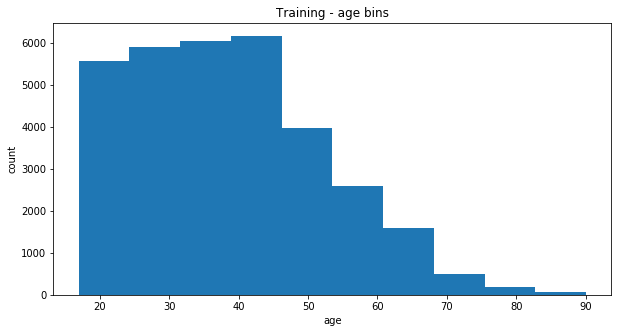

In [33]:
#plot histogram for training data
df['age'].plot(kind='hist', figsize=(10, 5))

# set x/y labels and plot title
plt.pyplot.xlabel("age")
plt.pyplot.ylabel("count")
plt.pyplot.title("Training - age bins")

Text(0.5, 1.0, 'Test - age bins')

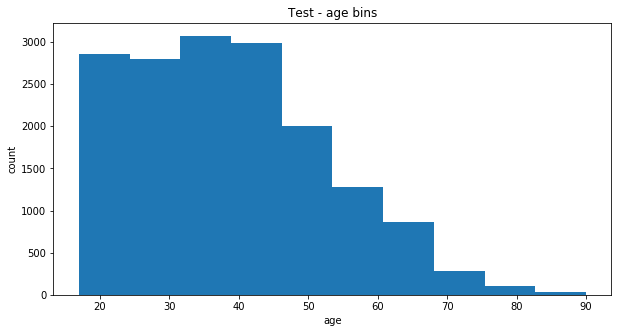

In [34]:
#plot histogram for test data
test['age'].plot(kind='hist', figsize=(10, 5))

# set x/y labels and plot title
plt.pyplot.xlabel("age")
plt.pyplot.ylabel("count")
plt.pyplot.title("Test - age bins")

Making categories for "age" feature

In [35]:
bins = np.linspace(min(df["age"]), max(df["age"]), 10)

bins

array([17.        , 25.11111111, 33.22222222, 41.33333333, 49.44444444,
       57.55555556, 65.66666667, 73.77777778, 81.88888889, 90.        ])

In [36]:
bins_test = np.linspace(min(test["age"]), max(test["age"]), 10)

bins_test

array([17.        , 25.11111111, 33.22222222, 41.33333333, 49.44444444,
       57.55555556, 65.66666667, 73.77777778, 81.88888889, 90.        ])

In [37]:
group_names = ['starter_workclass', 'junior work_class', 'mid_workclass','senior_workclass','Advanced_workclass','diminishing_workclass','junior_retired','sineor_retired','Advanced_retired']

In [38]:
df['age-binned'] = pd.cut(df['age'], bins, labels=group_names, include_lowest=True )
test['age-binned'] = pd.cut(test['age'], bins_test, labels=group_names, include_lowest=True )

In [39]:
#check if age are binned in training data
df[['age','age-binned']].head(9)

,age,age-binned
0,39,mid_workclass
1,50,Advanced_workclass
2,38,mid_workclass
3,53,Advanced_workclass
4,28,junior work_class
5,37,mid_workclass
6,49,senior_workclass
7,52,Advanced_workclass
8,31,junior work_class


In [40]:
#check if age are binned in training data
test[['age','age-binned']].head(9)

,age,age-binned
0,38,mid_workclass
1,28,junior work_class
2,44,senior_workclass
3,18,starter_workclass
4,34,mid_workclass
5,29,junior work_class
6,63,diminishing_workclass
7,24,starter_workclass
8,55,Advanced_workclass


Text(0.5, 1.0, 'Training - age bins')

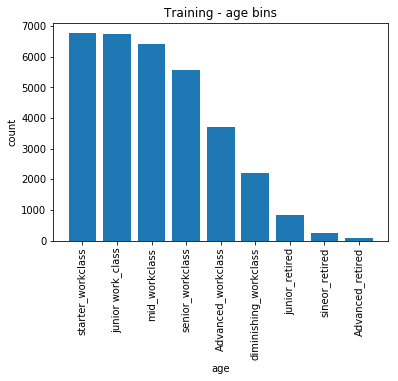

In [41]:
#Plot bar graph for training data
y=pyplot.bar(group_names, df["age-binned"].value_counts())
pyplot.xticks(rotation=90)

# set x/y labels and plot title
plt.pyplot.xlabel("age")
plt.pyplot.ylabel("count")
plt.pyplot.title("Training - age bins")





Text(0.5, 1.0, 'Test - age bins')

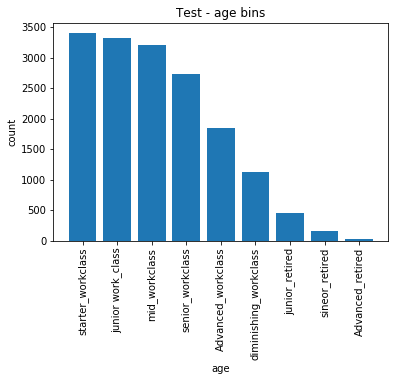

In [42]:
#Plot bar graph for test data
y=pyplot.bar(group_names, test["age-binned"].value_counts())
pyplot.xticks(rotation=90)

# set x/y labels and plot title
plt.pyplot.xlabel("age")
plt.pyplot.ylabel("count")
plt.pyplot.title("Test - age bins")


## fnlwgt

In [43]:
df['fnlwgt'].value_counts() #training data

164190     13
203488     13
123011     13
113364     12
121124     12
126675     12
148995     12
123983     11
190290     11
126569     11
155659     11
102308     11
120277     11
241998     11
111483     11
120131     11
188246     11
117963     10
174789     10
112497     10
193882     10
125933     10
216129     10
99185      10
125461     10
155489     10
194630     10
125892     10
119793     10
177675     10
           ..
118352      1
239415      1
288341      1
34393       1
110172      1
188982      1
67794       1
343646      1
210527      1
269246      1
349795      1
63079       1
142924      1
1268339     1
542265      1
222789      1
54851       1
312897      1
58447       1
48702       1
378045      1
34361       1
357943      1
65078       1
68318       1
284211      1
312881      1
177711      1
179758      1
229376      1
Name: fnlwgt, Length: 21648, dtype: int64

In [44]:
test['fnlwgt'].value_counts() #test data

136986    9
117310    8
125892    8
127651    8
120277    8
203488    8
190290    8
99185     7
111567    7
48520     7
179481    7
97723     7
126569    7
117789    6
160261    6
132879    6
72887     6
96062     6
104196    6
247328    6
186256    6
108140    6
112115    6
149337    6
53956     6
156464    6
186934    6
141584    5
165815    5
199118    5
         ..
291300    1
88545     1
194752    1
289223    1
260549    1
137984    1
88513     1
53776     1
188950    1
143964    1
145064    1
170108    1
203353    1
315984    1
139854    1
27207     1
188998    1
150083    1
120420    1
199227    1
201240    1
31285     1
117299    1
127424    1
119344    1
240175    1
45612     1
346478    1
107038    1
235523    1
Name: fnlwgt, Length: 12786, dtype: int64

Text(0.5, 1.0, 'Training - fnlwgt bins')

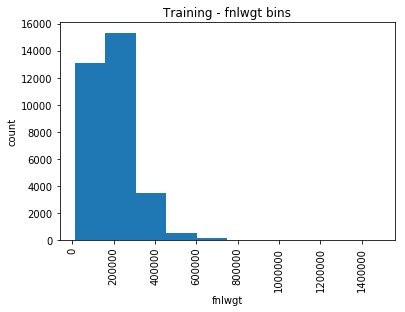

In [45]:
#plot histogram for trainig data
plt.pyplot.hist(df["fnlwgt"])
pyplot.xticks(rotation=90)

# set x/y labels and plot title
plt.pyplot.xlabel("fnlwgt")
plt.pyplot.ylabel("count")
plt.pyplot.title("Training - fnlwgt bins")

Text(0.5, 1.0, 'Test - fnlwgt bins')

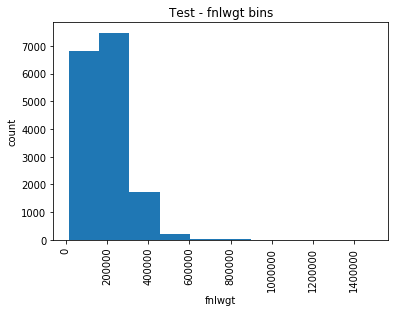

In [46]:
#plot histogram for test data
plt.pyplot.hist(test["fnlwgt"])
pyplot.xticks(rotation=90)

# set x/y labels and plot title
plt.pyplot.xlabel("fnlwgt")
plt.pyplot.ylabel("count")
plt.pyplot.title("Test - fnlwgt bins")

Making categories for "fnlwgt" feature

In [47]:
bins = np.linspace(min(df["fnlwgt"]), max(df["fnlwgt"]), 6)
bins

array([  12285.,  306769.,  601253.,  895737., 1190221., 1484705.])

In [48]:
bins_test = np.linspace(min(test["fnlwgt"]), max(test["fnlwgt"]), 6)
bins_test

array([  13492. ,  308873.6,  604255.2,  899636.8, 1195018.4, 1490400. ])

In [49]:
group_namesf=['class1','class2','class3','class4','class5']

In [50]:
df['fnlwgt-binned'] = pd.cut(df['fnlwgt'], bins, labels=group_namesf, include_lowest=True )
test['fnlwgt-binned'] = pd.cut(test['fnlwgt'], bins_test, labels=group_namesf, include_lowest=True )

Text(0.5, 1.0, 'Training - fnlwgt bins')

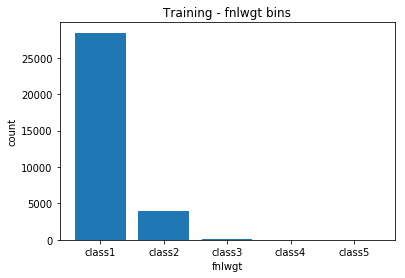

In [51]:
#plotting bar graph for training data
pyplot.bar(group_namesf, df["fnlwgt-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("fnlwgt")
plt.pyplot.ylabel("count")
plt.pyplot.title("Training - fnlwgt bins")

Text(0.5, 1.0, 'Test - fnlwgt bins')

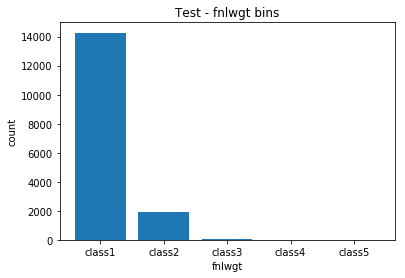

In [52]:
#plotting bar graph for test data
pyplot.bar(group_namesf, test["fnlwgt-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("fnlwgt")
plt.pyplot.ylabel("count")
plt.pyplot.title("Test - fnlwgt bins")

## education_num

In [53]:
df['education_num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

In [54]:
test['education_num'].value_counts()

9     5283
10    3587
13    2670
14     934
11     679
7      636
12     534
6      456
4      309
15     258
5      242
8      224
16     181
3      176
2       79
1       32
Name: education_num, dtype: int64

Text(0.5, 1.0, 'Training - education_num bins')

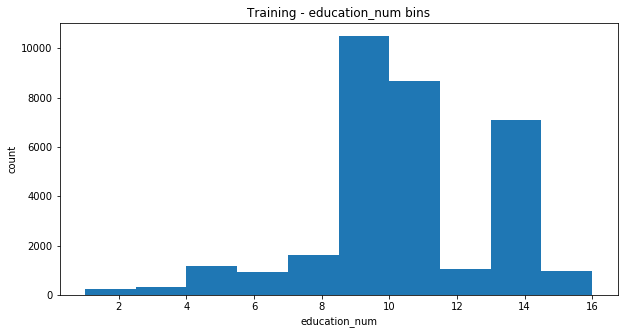

In [55]:
#plotting histogram for training data
plt.pyplot.figure(figsize=(10,5))
plt.pyplot.hist(df["education_num"])

# set x/y labels and plot title
plt.pyplot.xlabel("education_num")
plt.pyplot.ylabel("count")
plt.pyplot.title("Training - education_num bins")

Text(0.5, 1.0, 'Test - education_num bins')

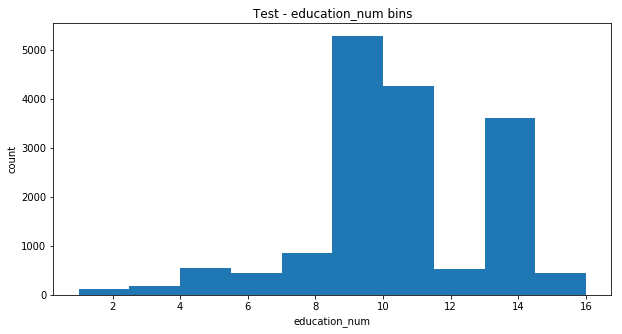

In [56]:
#plotting histogram for test data
plt.pyplot.figure(figsize=(10,5))
plt.pyplot.hist(test["education_num"])

# set x/y labels and plot title
plt.pyplot.xlabel("education_num")
plt.pyplot.ylabel("count")
plt.pyplot.title("Test - education_num bins")

In [57]:
bins = np.linspace(min(df["education_num"]), max(df["education_num"]), 11)

bins

array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ])

In [58]:
bins_test = np.linspace(min(test["education_num"]), max(test["education_num"]), 11)

bins_test

array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ])

In [59]:
group_namesEdu=['education1','education2','education3','education4','education5','education6','education7','education8','education9','education10']

In [60]:
df['education_num-binned'] = pd.cut(df['education_num'], bins, labels=group_namesEdu, include_lowest=True )
test['education_num-binned'] = pd.cut(test['education_num'], bins_test, labels=group_namesEdu, include_lowest=True )

Text(0.5, 1.0, 'Training - education_num bins')

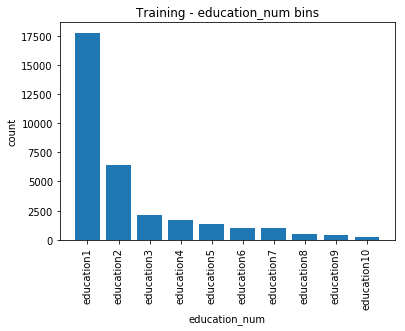

In [61]:
#plotting bar graph for traing data
pyplot.bar(group_namesEdu, df["education_num-binned"].value_counts())
pyplot.xticks(rotation=90)

# set x/y labels and plot title
plt.pyplot.xlabel("education_num")
plt.pyplot.ylabel("count")
plt.pyplot.title("Training - education_num bins")

Text(0.5, 1.0, 'Test - education_num bins')

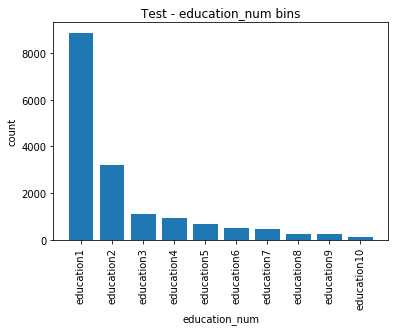

In [62]:
#plotting bar graph for test data
pyplot.bar(group_namesEdu, test["education_num-binned"].value_counts())
pyplot.xticks(rotation=90)

# set x/y labels and plot title
plt.pyplot.xlabel("education_num")
plt.pyplot.ylabel("count")
plt.pyplot.title("Test - education_num bins")

check if binned

In [63]:
df[['education_num','education_num-binned']].head(10)

,education_num,education_num-binned
0,13,education8
1,13,education8
2,9,education6
3,7,education4
4,13,education8
5,14,education9
6,5,education3
7,9,education6
8,14,education9
9,13,education8


In [64]:
test[['education_num','education_num-binned']].head(10)

,education_num,education_num-binned
0,9,education6
1,12,education8
2,10,education6
3,10,education6
4,6,education4
5,9,education6
6,15,education10
7,10,education6
8,4,education2
9,9,education6


## capital_gain

In [65]:
df['capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
5178        97
3103        97
4386        70
5013        69
8614        55
3325        53
2174        48
10520       43
4064        42
4650        41
14084       41
20051       37
3137        37
27828       34
594         34
3908        32
2829        31
13550       27
6849        27
14344       26
1055        25
2885        24
3411        24
4787        23
2176        23
         ...  
9562         4
1086         4
25124        4
1424         3
2961         3
7896         3
4687         3
2936         3
1173         3
5721         3
2009         3
6360         3
41310        2
6723         2
3456         2
2993         2
401          2
11678        2
2062         2
18481        2
7978         1
1639         1
2538         1
2387         1
5060         1
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital_gain, Length: 119, dtype: int64

In [66]:
test['capital_gain'].value_counts()

0        14957
15024      166
7688       126
7298       118
99999       85
3103        55
5178        49
5013        48
4386        38
3325        28
8614        27
2174        26
27828       24
4650        22
10520       21
594         18
13550       15
6849        15
3137        14
4787        12
1055        12
2202        12
20051       12
4416        12
4064        12
2597        11
2829        11
4508        11
3411        10
3908        10
         ...  
2346         2
2414         2
10566        2
3887         2
1831         2
914          2
11678        2
114          2
34095        1
2329         1
6767         1
5060         1
7262         1
2961         1
9562         1
2993         1
2062         1
4687         1
2936         1
991          1
41310        1
2036         1
1424         1
5556         1
6612         1
6097         1
7978         1
1731         1
7896         1
3273         1
Name: capital_gain, Length: 113, dtype: int64

Text(0.5, 1.0, 'Training - capital_gain bins')

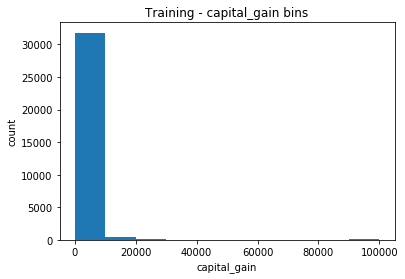

In [67]:
#plot histogram for training data
plt.pyplot.hist(df["capital_gain"])

# set x/y labels and plot title
plt.pyplot.xlabel("capital_gain")
plt.pyplot.ylabel("count")
plt.pyplot.title("Training - capital_gain bins")

Text(0.5, 1.0, 'Test - capital_gain bins')

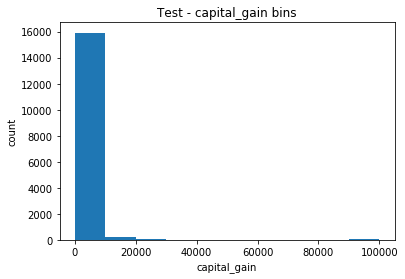

In [68]:
#plot histogram for test data
plt.pyplot.hist(test["capital_gain"])

# set x/y labels and plot title
plt.pyplot.xlabel("capital_gain")
plt.pyplot.ylabel("count")
plt.pyplot.title("Test - capital_gain bins")

Making categories for capital gain

In [69]:
bins = np.linspace(min(df["capital_gain"]), max(df["capital_gain"]), 11)
bins

array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
       69999.3, 79999.2, 89999.1, 99999. ])

In [70]:
bins_test = np.linspace(min(test["capital_gain"]), max(test["capital_gain"]), 11)
bins_test

array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
       69999.3, 79999.2, 89999.1, 99999. ])

In [71]:
group_namesCapitalG=['capital_gain1','capital_gain2','capital_gain3','capital_gain4','capital_gain5','capital_gain6','capital_gain7','capital_gain8','capital_gain9','capital_gain10']

In [72]:
df['capital_gain-binned'] = pd.cut(df['capital_gain'], bins, labels=group_namesCapitalG, include_lowest=True )
test['capital_gain-binned'] = pd.cut(test['capital_gain'], bins_test, labels=group_namesCapitalG, include_lowest=True )

Text(0.5, 1.0, 'Training - capital_gain bins')

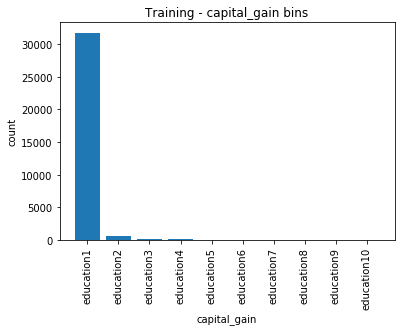

In [73]:
#plotting bar graph for training data
pyplot.bar(group_namesEdu, df["capital_gain-binned"].value_counts())
pyplot.xticks(rotation=90)
# set x/y labels and plot title
plt.pyplot.xlabel("capital_gain")
plt.pyplot.ylabel("count")
plt.pyplot.title("Training - capital_gain bins")

Text(0.5, 1.0, 'Test - capital_gain bins')

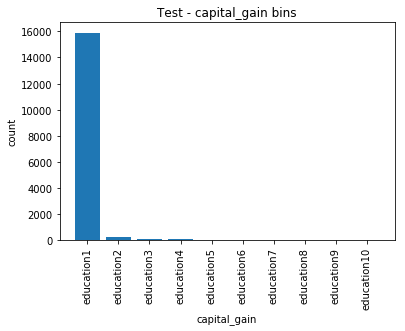

In [74]:
#plotting bar graph for test data
pyplot.bar(group_namesEdu, test["capital_gain-binned"].value_counts())
pyplot.xticks(rotation=90)
# set x/y labels and plot title
plt.pyplot.xlabel("capital_gain")
plt.pyplot.ylabel("count")
plt.pyplot.title("Test - capital_gain bins")

## capital_loss

In [75]:
df['capital_loss'].value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
1485       51
2415       49
1602       47
1740       42
1590       40
1876       39
1672       34
1564       25
2258       25
1669       24
1741       24
2001       24
1980       23
1719       22
2002       21
2051       21
1408       21
1579       20
2377       20
1721       18
1504       18
1974       18
2339       17
2179       15
1628       15
        ...  
323         3
4356        3
2267        3
3683        2
1755        2
2352        2
1648        2
1138        2
810         2
1735        2
2238        2
2754        2
3004        2
3900        2
974         2
2149        2
1816        2
3770        2
2080        1
2489        1
2282        1
2163        1
155         1
2467        1
1844        1
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital_loss, Length: 92, dtype: int64

In [76]:
test['capital_loss'].value_counts()

0       15517
1902      102
1977       85
1887       74
2415       23
1590       22
1485       20
1741       20
1876       20
1564       18
1848       16
1672       16
1719       16
1740       16
1602       15
2258       14
1408       14
1980       13
2002       12
2001       11
1669       11
1721       10
2057       10
2205       10
2339       10
1579       10
1974       10
1628        9
2051        8
2444        8
        ...  
2174        3
2246        2
2392        2
1617        2
1944        2
3175        2
1816        2
2603        2
1138        2
1258        2
2238        2
323         2
1651        2
3770        2
1844        2
2465        1
1648        1
2457        1
1735        1
213         1
2547        1
1825        1
1870        1
2163        1
2467        1
1594        1
2282        1
1421        1
653         1
1911        1
Name: capital_loss, Length: 82, dtype: int64

Text(0.5, 1.0, 'Traing - capital_loss bins')

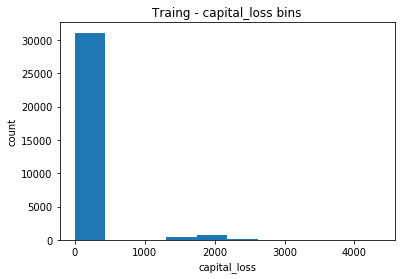

In [77]:
#plotting histogram for training data
plt.pyplot.hist(df["capital_loss"])

# set x/y labels and plot title
plt.pyplot.xlabel("capital_loss")
plt.pyplot.ylabel("count")
plt.pyplot.title("Traing - capital_loss bins")

Text(0.5, 1.0, 'Test - capital_loss bins')

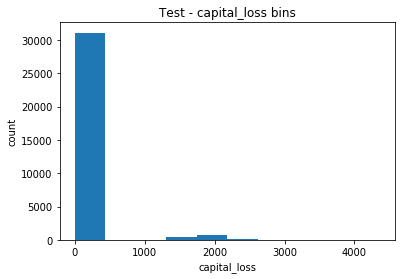

In [78]:
#plotting histogram for test data
plt.pyplot.hist(df["capital_loss"])

# set x/y labels and plot title
plt.pyplot.xlabel("capital_loss")
plt.pyplot.ylabel("count")
plt.pyplot.title("Test - capital_loss bins")

In [79]:
bins = np.linspace(min(df["capital_loss"]), max(df["capital_loss"]), 10)
bins

array([   0.,  484.,  968., 1452., 1936., 2420., 2904., 3388., 3872.,
       4356.])

In [80]:
bins_test = np.linspace(min(test["capital_loss"]), max(test["capital_loss"]), 10)
bins_test

array([   0.        ,  418.88888889,  837.77777778, 1256.66666667,
       1675.55555556, 2094.44444444, 2513.33333333, 2932.22222222,
       3351.11111111, 3770.        ])

In [81]:
group_namesCapitalLoss=['capital_loss1','capital_loss2','capital_loss3','capital_loss4','capital_loss5','capital_loss6','capital_loss7','capital_loss8','capital_loss9']

In [82]:
df['capital_loss-binned'] = pd.cut(df['capital_loss'], bins, labels=group_namesCapitalLoss, include_lowest=True )
test['capital_loss-binned'] = pd.cut(test['capital_loss'], bins_test, labels=group_namesCapitalLoss, include_lowest=True )

Text(0.5, 1.0, 'Training - capital_loss bins')

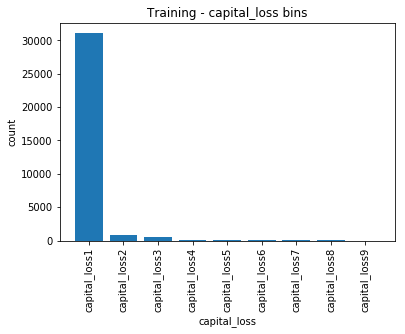

In [83]:
#plotting bar graph for training data
pyplot.bar(group_namesCapitalLoss, df["capital_loss-binned"].value_counts())
pyplot.xticks(rotation=90)
# set x/y labels and plot title
plt.pyplot.xlabel("capital_loss")
plt.pyplot.ylabel("count")
plt.pyplot.title("Training - capital_loss bins")

Text(0.5, 1.0, 'Test - capital_loss bins')

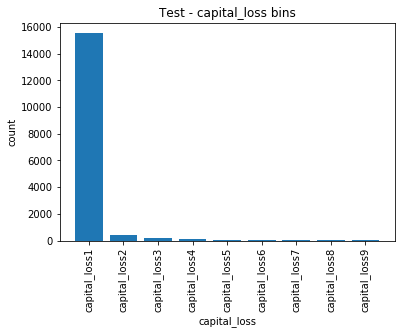

In [84]:
#plotting bar graph for test data
pyplot.bar(group_namesCapitalLoss, test["capital_loss-binned"].value_counts())
pyplot.xticks(rotation=90)
# set x/y labels and plot title
plt.pyplot.xlabel("capital_loss")
plt.pyplot.ylabel("count")
plt.pyplot.title("Test - capital_loss bins")

## hours_per_week

In [85]:
df['hours_per_week'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
20     1224
30     1149
55      694
25      674
48      517
38      476
15      404
70      291
10      278
32      266
24      252
65      244
36      220
42      219
44      212
16      205
12      173
43      151
37      149
8       145
52      138
80      133
56       97
28       86
99       85
      ...  
19       14
64       14
51       13
85       13
68       12
98       11
11       11
63       10
78        8
29        7
77        6
59        5
31        5
96        5
67        4
91        3
76        3
81        3
73        2
89        2
97        2
88        2
86        2
61        2
95        2
92        1
94        1
87        1
74        1
82        1
Name: hours_per_week, Length: 94, dtype: int64

In [86]:
test['hours_per_week'].value_counts()

40    7585
50    1427
45     893
60     702
35     640
20     638
30     551
55     357
25     284
48     253
38     238
15     219
32     157
10     147
70     146
42     119
36     116
65     111
24     102
44      98
16      98
37      93
80      77
43      76
12      74
8       73
52      67
18      54
28      54
99      52
      ... 
9        9
29       8
64       8
1        7
31       7
51       7
66       6
62       5
13       5
19       5
63       5
78       5
96       4
85       4
68       4
98       3
77       3
57       2
61       2
67       2
59       2
88       2
74       2
86       2
92       2
73       2
76       1
89       1
69       1
79       1
Name: hours_per_week, Length: 89, dtype: int64

Text(0.5, 1.0, 'training - hours_per_week bins')

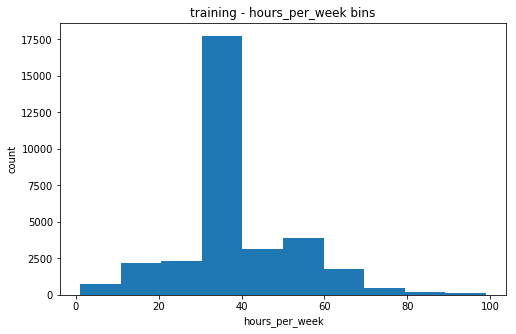

In [87]:
#plotting histogram for training data
plt.pyplot.figure(figsize=(8,5))
plt.pyplot.hist(df["hours_per_week"])

# set x/y labels and plot title
plt.pyplot.xlabel("hours_per_week")
plt.pyplot.ylabel("count")
plt.pyplot.title("training - hours_per_week bins")

Text(0.5, 1.0, 'test - hours_per_week bins')

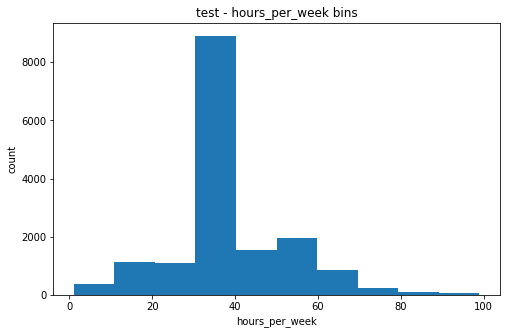

In [88]:
#plotting histogram for test data
plt.pyplot.figure(figsize=(8,5))
plt.pyplot.hist(test["hours_per_week"])

# set x/y labels and plot title
plt.pyplot.xlabel("hours_per_week")
plt.pyplot.ylabel("count")
plt.pyplot.title("test - hours_per_week bins")

In [89]:
bins = np.linspace(min(df["hours_per_week"]), max(df["hours_per_week"]), 11)
bins

array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ])

In [90]:
bins_test = np.linspace(min(test["hours_per_week"]), max(test["hours_per_week"]), 11)
bins_test

array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ])

In [91]:
group_namesHours=['hours1','hours2','hours3','hours4','hours5','hours6','hours7','hours8','hours9','hours10']

In [92]:
df['hours_per_week-binned'] = pd.cut(df['hours_per_week'], bins, labels=group_namesHours, include_lowest=True )
test['hours_per_week-binned'] = pd.cut(test['hours_per_week'], bins_test, labels=group_namesHours, include_lowest=True )

Text(0.5, 1.0, 'Training - hours_per_week bins')

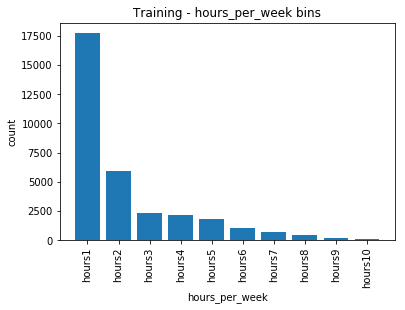

In [93]:
#plotting bar graph for training data
pyplot.bar(group_namesHours, df["hours_per_week-binned"].value_counts())
pyplot.xticks(rotation=90)
# set x/y labels and plot title
plt.pyplot.xlabel("hours_per_week")
plt.pyplot.ylabel("count")
plt.pyplot.title("Training - hours_per_week bins")

Text(0.5, 1.0, 'Test - hours_per_week bins')

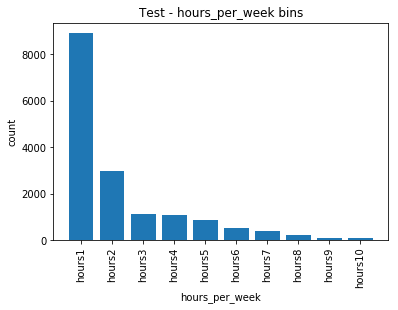

In [94]:
#plotting bar graph for test data
pyplot.bar(group_namesHours, test["hours_per_week-binned"].value_counts())
pyplot.xticks(rotation=90)
# set x/y labels and plot title
plt.pyplot.xlabel("hours_per_week")
plt.pyplot.ylabel("count")
plt.pyplot.title("Test - hours_per_week bins")

In [95]:
df[['hours_per_week','hours_per_week-binned']].head(20)

,hours_per_week,hours_per_week-binned
0,40,hours4
1,13,hours2
2,40,hours4
3,40,hours4
4,40,hours4
5,40,hours4
6,16,hours2
7,45,hours5
8,50,hours5
9,40,hours4


In [96]:
test[['hours_per_week','hours_per_week-binned']].head(20)

,hours_per_week,hours_per_week-binned
0,50,hours5
1,40,hours4
2,40,hours4
3,30,hours3
4,30,hours3
5,40,hours4
6,32,hours4
7,40,hours4
8,10,hours1
9,40,hours4


#  Export Processed Data
exporting processed training and testing data to a csv document

In [97]:
df.to_csv('dataProccesed2.csv')
test.to_csv('testDataProcessed.csv')

# Graph Descriptions
visualizing relationship between features

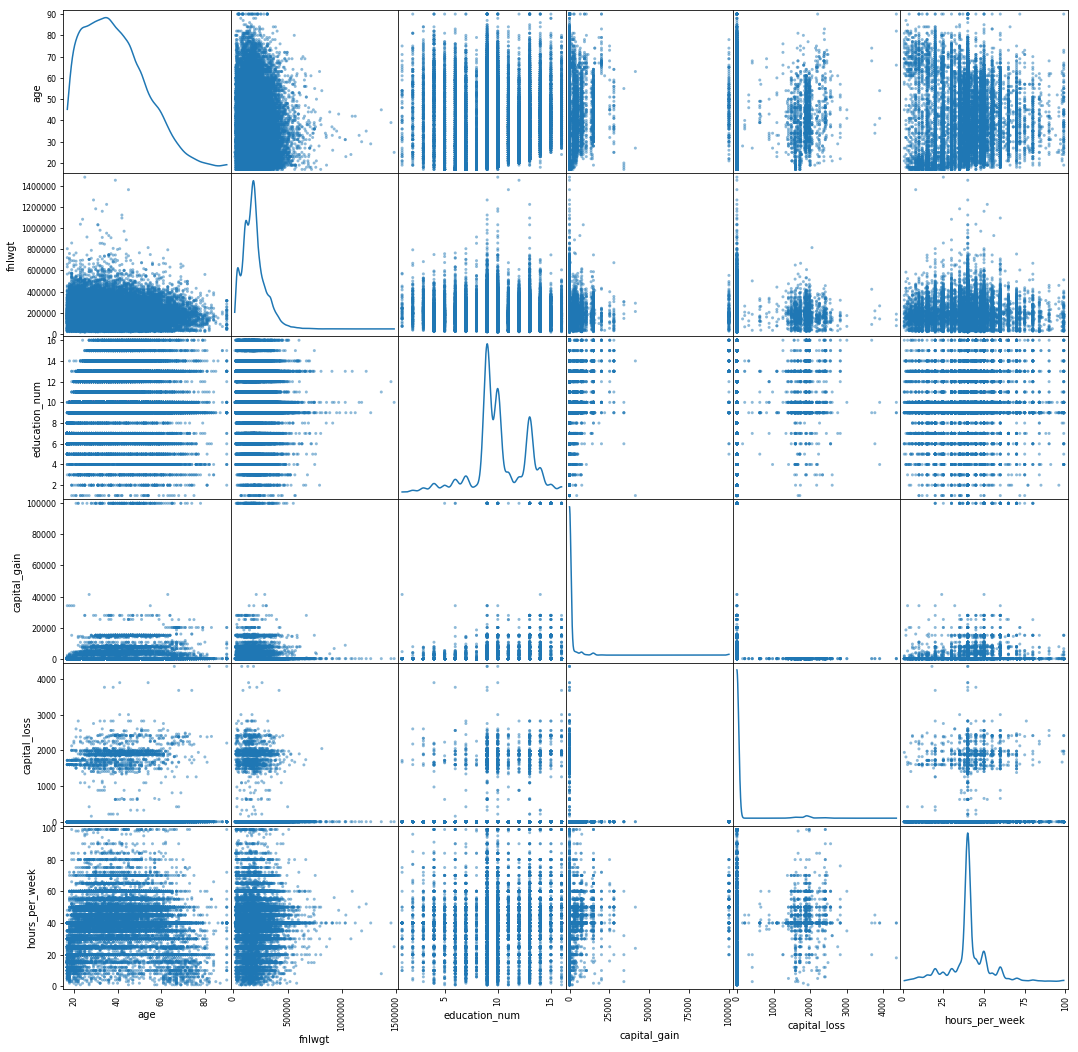

In [98]:
#relationship between features on training data
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=[18,18],diagonal='kde')
pass

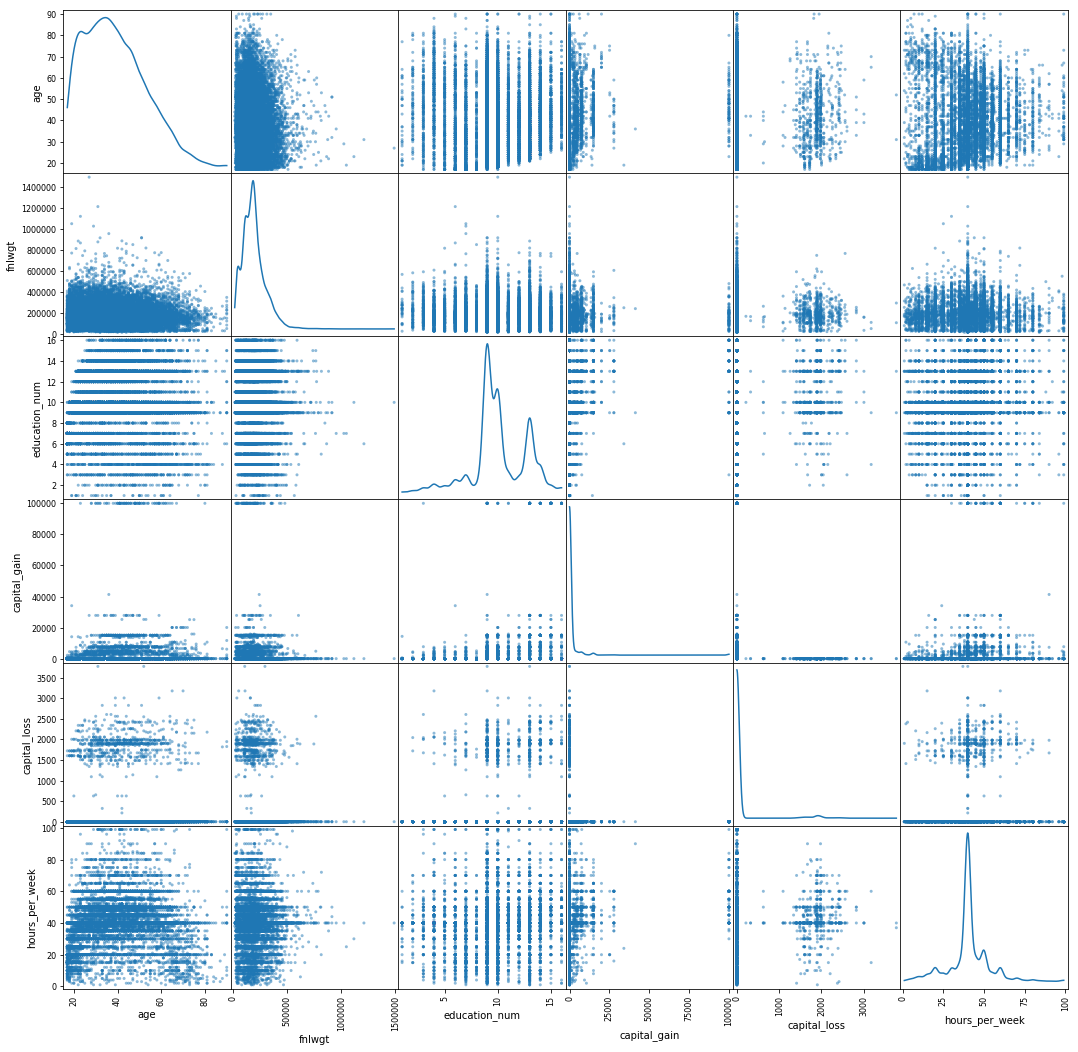

In [99]:
#relationship between features on test data
from pandas.plotting import scatter_matrix
scatter_matrix(test, figsize=[18,18],diagonal='kde')
pass

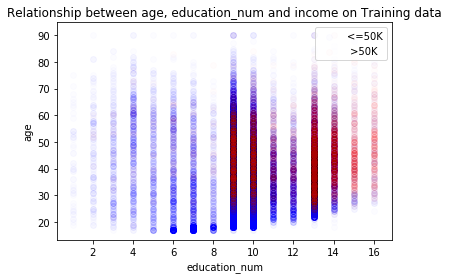

In [100]:
#Relationship between age, education_num and income on Training data
pyplot.scatter(df[df['income_class']==' <=50K']['education_num'],
            df[df['income_class']==' <=50K']['age'],
            alpha=0.01,
            label='<=50K',
            color='b'
            )
pyplot.scatter(df[df['income_class']==' >50K']['education_num'],
            df[df['income_class']==' >50K']['age'],
            alpha=0.01,
            label=' >50K',
            color='r'
            )
pyplot.legend()
plt.pyplot.title("Relationship between age, education_num and income on Training data")
plt.pyplot.xlabel("education_num")
plt.pyplot.ylabel("age")
pyplot.show()

#red  = (>50K) Those earning more than 50K
#blue = (<=50K) Those earning less than 50K

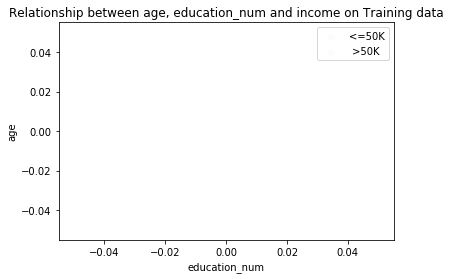

In [101]:
#Relationship between age, education_num and income on Training data
pyplot.scatter(test[test['income_class']==' <=50K']['education_num'],
            test[test['income_class']==' <=50K']['age'],
            alpha=0.01,
            label='<=50K',
            color='b'
            )
pyplot.scatter(test[test['income_class']==' >50K']['education_num'],
            test[test['income_class']==' >50K']['age'],
            alpha=0.01,
            label=' >50K',
            color='r'
            )
pyplot.legend()
plt.pyplot.title("Relationship between age, education_num and income on Training data")
plt.pyplot.xlabel("education_num")
plt.pyplot.ylabel("age")
pyplot.show()

#red  = (>50K) Those earning more than 50K
#blue = (<=50K) Those earning less than 50K

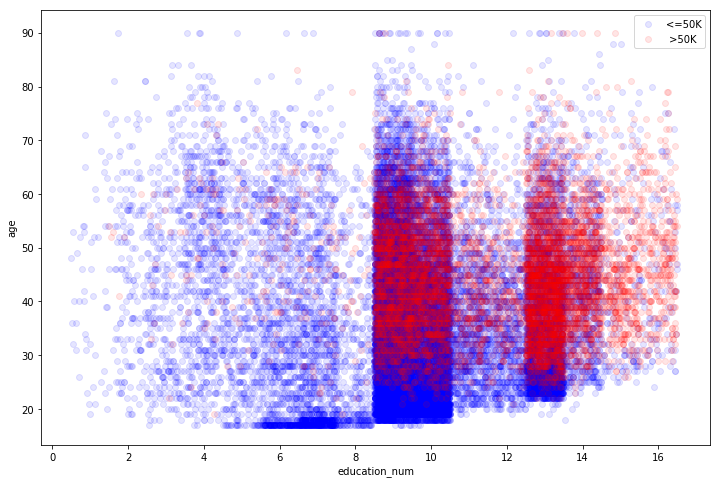

In [102]:
df['education_num_rand']= df['education_num'] +np.random.uniform(-0.5,0.5,len(df))
pyplot.figure(figsize=(12,8))
pyplot.scatter(df[df['income_class']==' <=50K']['education_num_rand'],
            df[df['income_class']==' <=50K']['age'],
            alpha=0.1,
            label='<=50K',
            color='b'
            )
pyplot.scatter(df[df['income_class']==' >50K']['education_num_rand'],
            df[df['income_class']==' >50K']['age'],
            alpha=0.1,
            label=' >50K',
            color='r'
            )
pyplot.legend()
# plt.pyplot.title("Relationship between age income and Number of study years")
plt.pyplot.xlabel("education_num")
plt.pyplot.ylabel("age")
pyplot.show()
df = df.drop('education_num_rand', axis =1)

In [103]:
cat_attributes = df.select_dtypes(include=['object'])
print(cat_attributes.columns)


Index(['workclass', 'education', 'martial_status', 'occupation',
       'RelationShip', 'race', 'sex', 'native_country', 'income_class'],
      dtype='object')


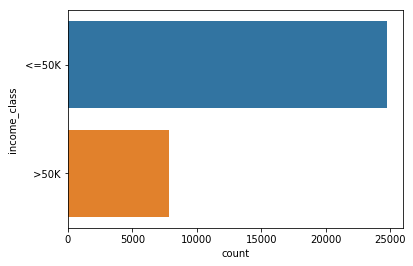

In [104]:
import seaborn as sns

# how many are <= 50 and >50K
sns.countplot(y = "income_class", data = df)

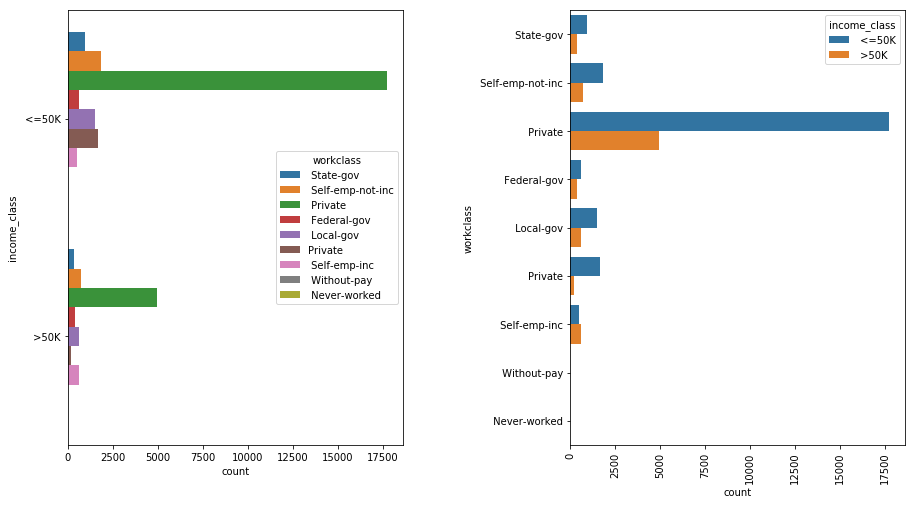

In [105]:
fig, ax = pyplot.subplots(1,2, figsize=(15,8))
pyplot.xticks(rotation=90)
sns.countplot(y='income_class', hue='workclass', data = cat_attributes, ax = ax[0])
sns.countplot(y='workclass', hue='income_class', data = cat_attributes, ax = ax[1])
pyplot.subplots_adjust(wspace=.5)
pyplot.show()

From the data above we can see that the private sector ....

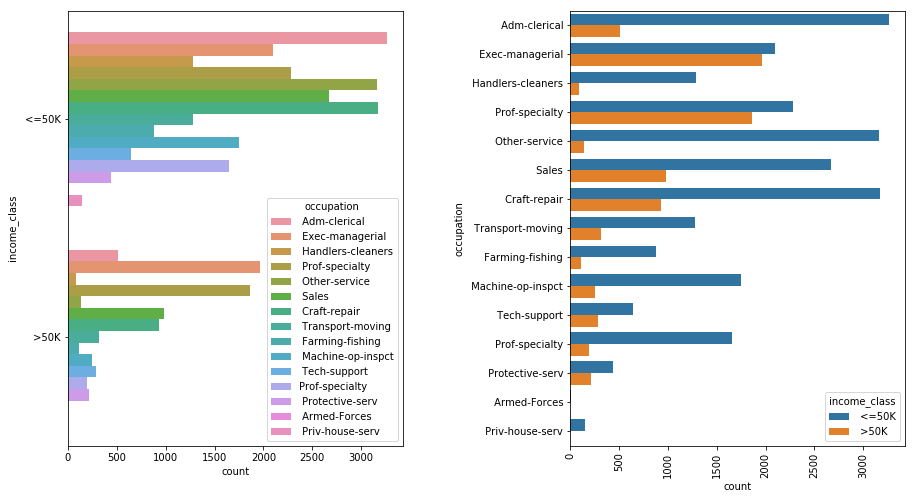

In [106]:
fig, ax = pyplot.subplots(1,2, figsize=(15,8))
pyplot.xticks(rotation=90)
sns.countplot(y='income_class', hue='occupation', data = cat_attributes, ax = ax[0])
sns.countplot(y='occupation', hue='income_class', data = cat_attributes)
pyplot.subplots_adjust(wspace=.5)
pyplot.show()

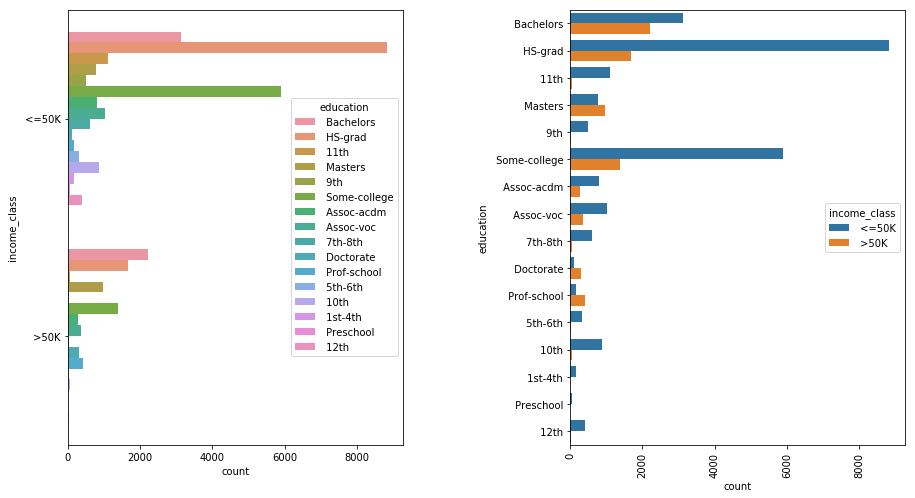

In [107]:
fig, ax = pyplot.subplots(1,2, figsize=(15,8))
pyplot.xticks(rotation=90)
sns.countplot(y='income_class', hue='education', data = cat_attributes, ax = ax[0])
sns.countplot(y='education', hue='income_class', data = cat_attributes)
pyplot.subplots_adjust(wspace=.5)
pyplot.show()

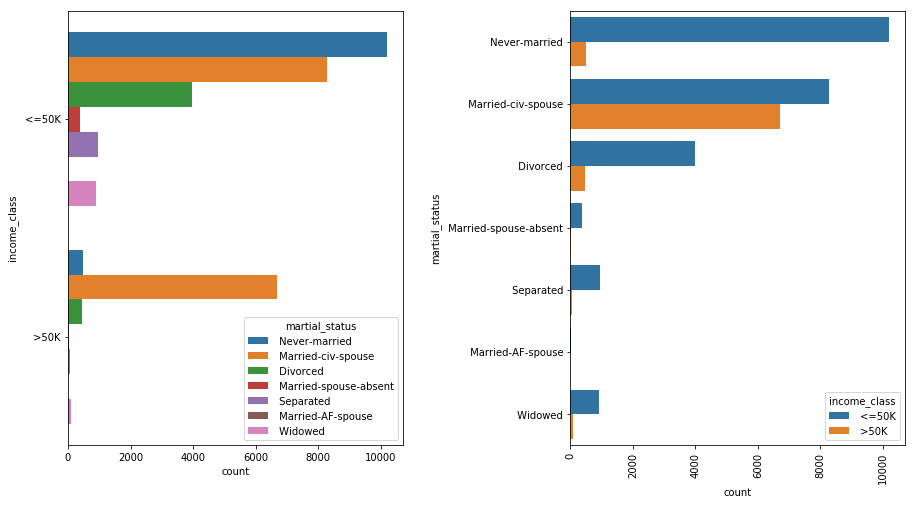

In [108]:
fig, ax = pyplot.subplots(1,2, figsize=(15,8))
pyplot.xticks(rotation=90)
sns.countplot(y='income_class', hue='martial_status', data = cat_attributes, ax = ax[0])
sns.countplot(y='martial_status', hue='income_class', data = cat_attributes)
pyplot.subplots_adjust(wspace=.5)
pyplot.show()

In [109]:
df.head(2)

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,RelationShip,race,sex,...,capital_loss,hours_per_week,native_country,income_class,age-binned,fnlwgt-binned,education_num-binned,capital_gain-binned,capital_loss-binned,hours_per_week-binned
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,40,United-States,<=50K,mid_workclass,class1,education8,capital_gain1,capital_loss1,hours4
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,13,United-States,<=50K,Advanced_workclass,class1,education8,capital_gain1,capital_loss1,hours2


In [110]:
df["sex"].head(5)

0       Male
1       Male
2       Male
3       Male
4     Female
Name: sex, dtype: object

Sex has male and female. These are string that need to  be changed to numbers. If we check cells, it we can use use one input to check, male or not male.

In [111]:
sex = pd.get_dummies(df["sex"])

In [112]:
sex.head(5)

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [113]:
sex = pd.get_dummies(df["sex"], drop_first=True)

In [114]:
sex.head(5)

,Male
0,1
1,1
2,1
3,1
4,0


Delete sex and concatinate sex

In [115]:
df["income_class"] = [0 if x == '<=50k' else 1 for x in df['income_class']]

In [116]:
df['income_class'].sample(5)

4848     1
22524    1
19704    1
6652     1
1838     1
Name: income_class, dtype: int64

In [117]:
education = pd.get_dummies(df["education"])

In [118]:
education.sample(5)

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
14001,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
19161,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
29679,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
23498,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
23270,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [119]:
# Check how many unique values exist per column

for col in df.columns:
    if df[col].dtypes == 'object':
        unique_cat = len(df[col].unique())
        print("Feature '{col}' has {unique_cat} unique categories".format(col=col, unique_cat = unique_cat))


Feature 'workclass' has 9 unique categories
Feature 'education' has 16 unique categories
Feature 'martial_status' has 7 unique categories
Feature 'occupation' has 15 unique categories
Feature 'RelationShip' has 6 unique categories
Feature 'race' has 5 unique categories
Feature 'sex' has 2 unique categories
Feature 'native_country' has 42 unique categories


In [120]:
# since most of the data in native_country come from the same county, US,
# we decided to rename all the other categories to other
hey = df
hey['native_country'] = [' United-States' if x == ' United-States' else 'Other' for x in hey['native_country']]
print(df['native_country'].value_counts())

 United-States    29170
Other              3391
Name: native_country, dtype: int64


In [121]:
# hey = 

In [122]:
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x,1)
        df = pd.concat([df, dummies], axis = 1)

In [123]:
df.head(5)

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,RelationShip,race,sex,...,capital_loss,hours_per_week,native_country,income_class,age-binned,fnlwgt-binned,education_num-binned,capital_gain-binned,capital_loss-binned,hours_per_week-binned
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,40,United-States,1,mid_workclass,class1,education8,capital_gain1,capital_loss1,hours4
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,13,United-States,1,Advanced_workclass,class1,education8,capital_gain1,capital_loss1,hours2
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,40,United-States,1,mid_workclass,class1,education6,capital_gain1,capital_loss1,hours4
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,40,United-States,1,Advanced_workclass,class1,education4,capital_gain1,capital_loss1,hours4
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,40,Other,1,junior work_class,class2,education8,capital_gain1,capital_loss1,hours4


In [124]:
def plot_histogram(x):
    pyplot.hist(x, color="gray", alpha = 0.5)
    pyplot.title("Histogram of '{var_name}'".format(var_name=x.name))
    pyplot.xlabel(x.name)
    pyplot.ylabel("count")
    pyplot.show

In [125]:
def plot_histogram_cat(x, y):
    pyplot.hist(list(x[y==0]), alpha = 0.5, label = '<= 50K')
    pyplot.hist(list(x[y==1]), alpha = 0.5, label = '>50K')
    pyplot.title("Histogram of '{var_name}' by Category".format(var_name=x.name))
    pyplot.xlabel(x.name)
    pyplot.ylabel("count")
    pyplot.legend(loc = 'upper right')
    pyplot.show

In [126]:
pd.crosstab(df['race'],df['native_country'], margins=True)

native_country,United-States,Other,All
race,,,
Amer-Indian-Eskimo,296,15,311
Asian-Pac-Islander,292,747,1039
Black,2832,292,3124
Other,129,142,271
White,25621,2195,27816
All,29170,3391,32561


In [127]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
Private               1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

Inferences:

    Married citizens with spouse have higher chances of earning more than those who're unmarried/divorced/widowed/separated.
    Males on an average make earn more than females.
    Higher Education can lead to higher income in most cases.
    Asian-Pacific-Islanders and white are two races that have the highest average income.


/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


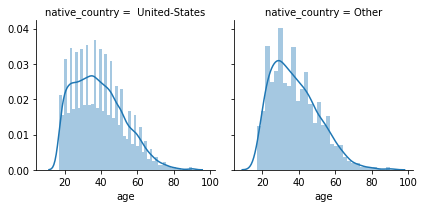

In [128]:
g = sns.FacetGrid(df, col='native_country')
g = g.map(sns.distplot, "age")
pyplot.show()

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


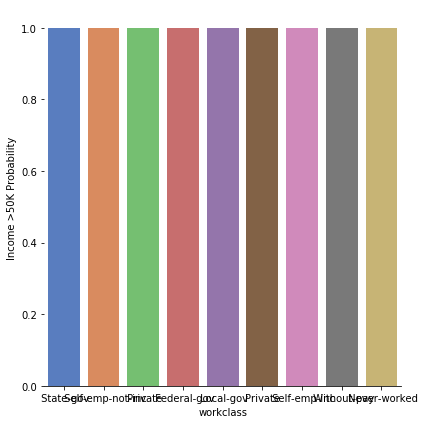

In [129]:


# Explore Workclass vs Income
g = sns.factorplot(x="workclass",y="income_class",data=df,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
pyplot.show()



/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


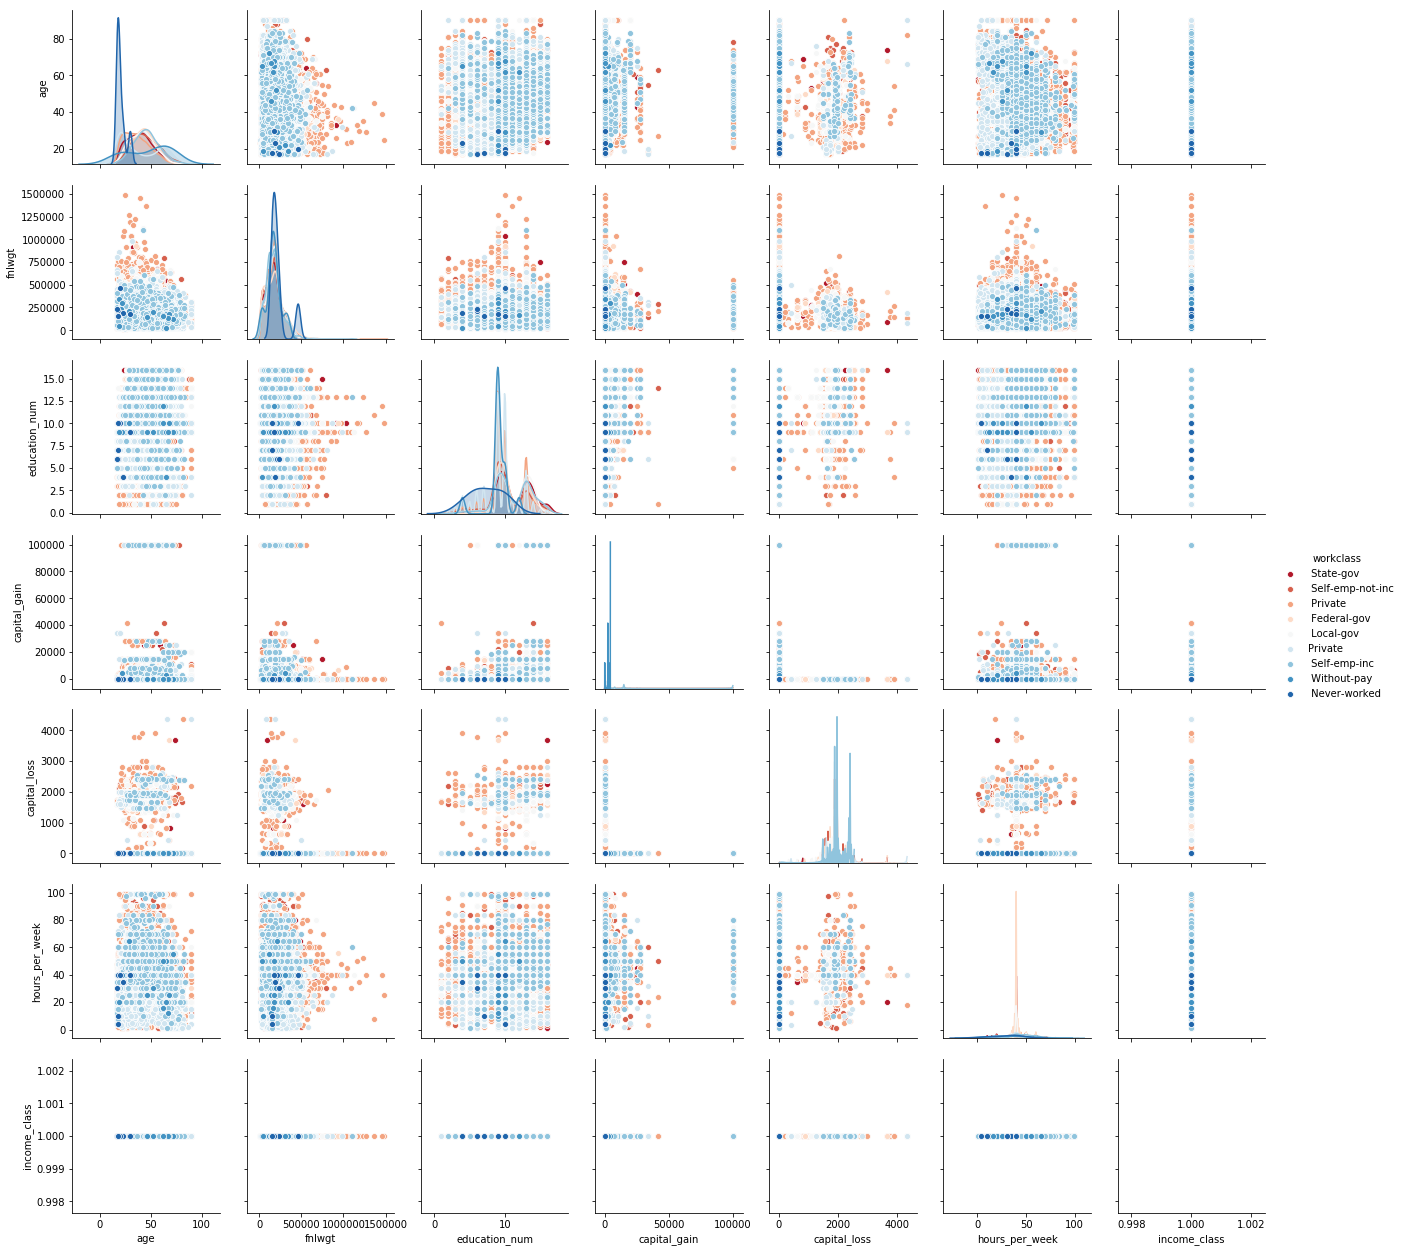

In [130]:
cols =[
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education_num",
    "martial_status",
    "occupation",
    "RelationShip",
    "race","sex",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "income_class"
]

sns.pairplot(data=df[cols], hue='workclass', palette='RdBu')

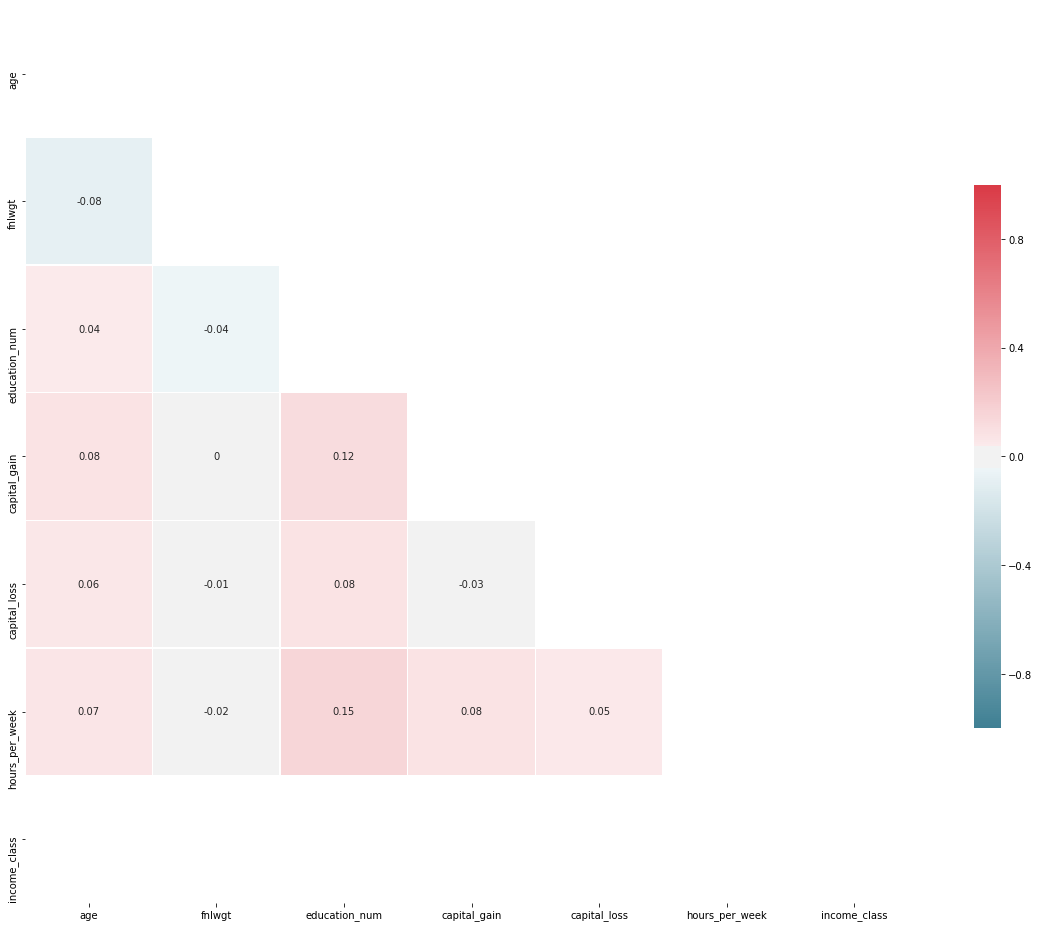

In [131]:
# Generate and visualize the correlation matrix
corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = pyplot.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# plt.tight_layout()

In [132]:
import_source="https://raw.githubusercontent.com/SimbarasheJehol/MachineLearningProject/master/adult.csv"
df = pd.read_csv(import_source,header=None)
print("data is loaded")

data is loaded


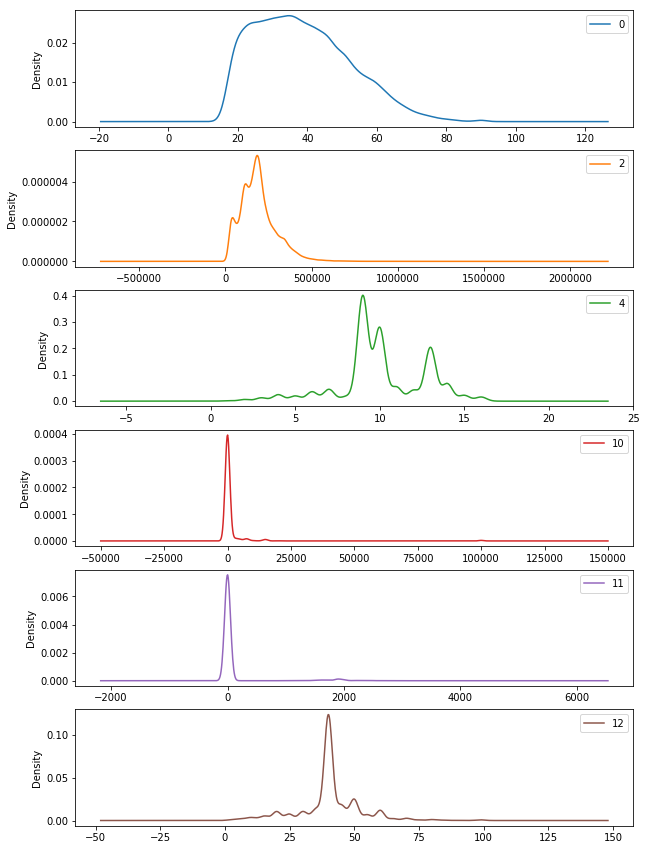

In [133]:
df.plot(kind='density', subplots=True, figsize=(10,15), sharex=False)
pyplot.show()

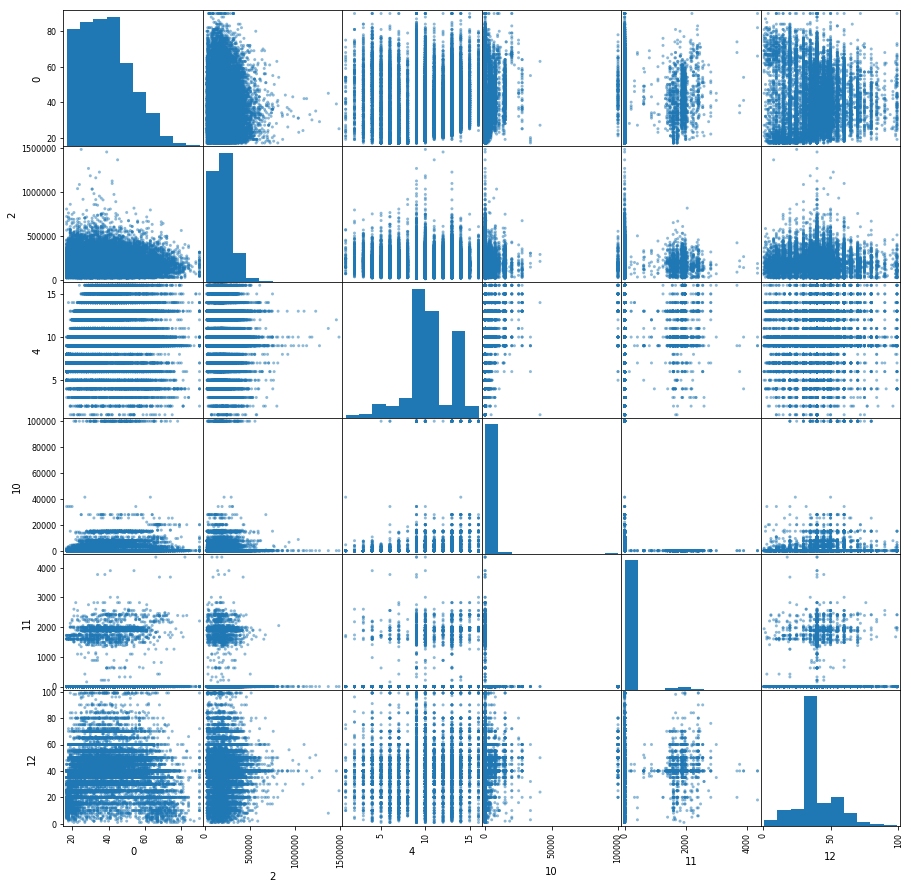

In [135]:
scatter_matrix(df, figsize=(15,15))
pyplot.show()